In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import Imputer
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [46]:
lu = pd.read_csv('Tom')

In [4]:
lu.drop(lu[lu['avg_score'] == -1].index, inplace = True) 

In [47]:
lu.drop(lu[lu['number_of_tweet'] < 400].index, inplace = True) 

In [48]:
lu.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 76 entries, 1 to 1831
Data columns (total 11 columns):
Unnamed: 0         76 non-null int64
date               76 non-null object
Unnamed: 0.1       76 non-null int64
name               76 non-null object
tweets             76 non-null object
prices             76 non-null float64
tweet_lists        76 non-null object
word_lists         76 non-null object
number_of_tweet    76 non-null int64
avg_score          76 non-null float64
standard_dev       76 non-null float64
dtypes: float64(3), int64(3), object(5)
memory usage: 7.1+ KB


In [49]:
up_down = []
for row in lu['prices']:
    if(row > 0):
        up_down.append(1)
    else:
        up_down.append(0)
        
spread = []
for row in lu['standard_dev']:
    if(row > 1.5):
        spread.append(1)
    else:
        spread.append(0)
        
score = []
for row in lu['avg_score']:
    if(row > 0.5):
        score.append(1)
    else:
        score.append(0)

In [50]:
#lu['standard_dev_bin'] = spread
lu['prices_bin'] = up_down
#lu['score_bins'] = score

In [51]:
features = np.array(lu['standard_dev']).reshape(-1,1)
target = np.array(lu['prices_bin'])
X = np.array(lu[['standard_dev']])
y = np.array(lu['prices_bin'])

In [58]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size = 0.2, random_state = 32)

In [59]:
clf = GaussianNB()
clf.fit(features_train, target_train)
target_pred = clf.predict(features_test)

In [60]:
accuracy_score(target_test, target_pred)

0.625

In [55]:
X_test = features_test
y_test = target_test

In [56]:
if len(X_test[y_test == 0]) / (len(X_test)*1.) > 0.5:
    null_accuracy = len(X_test[y_test == 0]) / (len(X_test)*1.)
else:
    null_accuracy = 1. - (len(X_test[y_test == 0]) / (len(X_test)*1.))

In [61]:
null_accuracy

0.5

In [18]:
from keras.models import Sequential
from keras.layers import Dense
import numpy
# fix random seed for reproducibility
numpy.random.seed(7)

Using TensorFlow backend.


In [46]:
test  = np.array([0.25, 0.50, 0.75]).reshape(-1,1)

In [47]:
print(test)
clf.predict(test)

[[0.25]
 [0.5 ]
 [0.75]]


array([0, 1, 0])

In [48]:
model = Sequential()
model.add(Dense(12, input_dim=1, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [49]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [50]:
model.fit(X, y, epochs=150, batch_size=10)

Epoch 1/150
115/115 [==============================] - 0s 2ms/step - loss: 0.6945 - acc: 0.4957
Epoch 2/150
115/115 [==============================] - 0s 78us/step - loss: 0.6942 - acc: 0.4609
Epoch 3/150
115/115 [==============================] - 0s 116us/step - loss: 0.6940 - acc: 0.4522
Epoch 4/150
115/115 [==============================] - 0s 122us/step - loss: 0.6939 - acc: 0.4522
Epoch 5/150
115/115 [==============================] - 0s 205us/step - loss: 0.6938 - acc: 0.4609
Epoch 6/150
115/115 [==============================] - 0s 106us/step - loss: 0.6936 - acc: 0.4609
Epoch 7/150
115/115 [==============================] - 0s 183us/step - loss: 0.6935 - acc: 0.4522
Epoch 8/150
115/115 [==============================] - 0s 159us/step - loss: 0.6934 - acc: 0.4522
Epoch 9/150
115/115 [==============================] - 0s 165us/step - loss: 0.6934 - acc: 0.4609
Epoch 10/150
115/115 [==============================] - 0s 146us/step - loss: 0.6933 - acc: 0.4870
Epoch 11/150
115/115 [

115/115 [==============================] - 0s 88us/step - loss: 0.6920 - acc: 0.5391
Epoch 85/150
115/115 [==============================] - 0s 103us/step - loss: 0.6919 - acc: 0.5391
Epoch 86/150
115/115 [==============================] - 0s 152us/step - loss: 0.6919 - acc: 0.5391
Epoch 87/150
115/115 [==============================] - 0s 113us/step - loss: 0.6918 - acc: 0.5391
Epoch 88/150
115/115 [==============================] - 0s 91us/step - loss: 0.6918 - acc: 0.5391
Epoch 89/150
115/115 [==============================] - 0s 90us/step - loss: 0.6918 - acc: 0.5304
Epoch 90/150
115/115 [==============================] - 0s 121us/step - loss: 0.6917 - acc: 0.5391
Epoch 91/150
115/115 [==============================] - 0s 105us/step - loss: 0.6917 - acc: 0.5391
Epoch 92/150
115/115 [==============================] - 0s 76us/step - loss: 0.6917 - acc: 0.5391
Epoch 93/150
115/115 [==============================] - 0s 106us/step - loss: 0.6916 - acc: 0.5391
Epoch 94/150
115/115 [=====

In [51]:
scores = model.evaluate(X, y)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

115/115 [==============================] - 0s 514us/step

acc: 53.91%


In [52]:
model.predict([X])

array([[0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.48673558],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.50799793],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5043566 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.50619274],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5035156 ],
       [0.5089218 ],
       [0.48976547],
       [0.5089218 ],
       [0.5089218 ],
       [0.5085818 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.5089218 ],
       [0.508

In [26]:
import matplotlib as plt
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
def heatMap(df):
    #Create Correlation df
    corr = df.corr()
    #Plot figsize
    fig, ax = plt.subplots(figsize=(5, 5))
    #Generate Color Map
    colormap = sns.diverging_palette(220, 10, as_cmap=True)
    #Generate Heat Map, allow annotations and place floats in map
    sns.heatmap(corr, cmap=colormap, annot=True, fmt=".2f")
    #Apply xticks
    plt.xticks(range(len(corr.columns)), corr.columns);
    #Apply yticks
    plt.yticks(range(len(corr.columns)), corr.columns)
    #show plot
    plt.show()


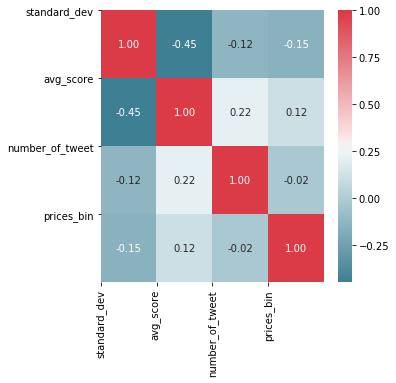

In [31]:
heatMap(lu[['standard_dev', 'avg_score', 'number_of_tweet', 'prices_bin']])